In [46]:
try:
    import warnings
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import cufflinks as cf
    import plotly.graph_objects as go
    import plotly.express as px
    from sklearn import linear_model
    import chart_studio.plotly as py
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_selection import chi2
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectKBest
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import ExtraTreesRegressor
    from sklearn.metrics import mean_squared_error , r2_score
    warnings.filterwarnings('ignore')
    from plotly.offline import download_plotlyjs , plot , iplot , init_notebook_mode
    init_notebook_mode(connected = True)
    cf.go_offline()
    
except ModuleNotFoundError as e:
    print(e)

car_data = pd.read_csv("car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [47]:
class Eda:
    def shape(self,dataset):
        print('number of rows : ',dataset.shape[0],'number of columns : ',dataset.shape[1])
        
    def description(self,dataset):
        return dataset.describe()
    
    def null_values(self,dataset):
        return dataset.isnull().sum()
   
    def car_by_fuel_type(self,dataset):
        total_cars_by_value = {}
        for cols in dataset['Fuel_Type']:
            if cols not in total_cars_by_value:
                total_cars_by_value[cols] = 1
            else:
                total_cars_by_value[cols] = total_cars_by_value[cols] + 1
        print(total_cars_by_value)
        
    def car_by_transmission(self,dataset):
        transmission = {}
        for cols in dataset['Transmission']:
            if cols not in transmission:
                transmission[cols] = 1
            else:
                transmission[cols] = transmission[cols] + 1
        print(transmission)
        
    def seller(self,dataset):
        seller = {}
        for cols in dataset['Seller_Type']:
            if cols not in seller:
                seller[cols] = 1
            else:
                seller[cols] = seller[cols] + 1
        print(seller)
    
    def total_years(self,dataset):
        year_count = {}
        for cols in dataset['Year']:
            if cols not in year_count:
                year_count[cols] = 1
            else:
                year_count[cols] = year_count[cols] + 1
        print(year_count)
            
e = Eda()
print('shape of our dataset')
e.shape(car_data)
print('**************')
x = e.description(car_data)
print(x)
print('**************')
y = e.null_values(car_data)
print(y)
print('**************')
print('Total Cars fuel type ')
e.car_by_fuel_type(car_data)
print()
print('Total Cars by transmission : ')
e.car_by_transmission(car_data)
print()
print('Car Seller Type ')
e.seller(car_data)
print()
print('Total Year Count ')
e.total_years(car_data)

shape of our dataset
number of rows :  301 number of columns :  9
**************
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000
**************
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
**************
Total Cars fuel type 

In [48]:
class Feature_extraction:
    
    def create_feature(self,dataset):
        dataset['Current_year'] = 2020
        
    def year_difference(self,dataset):
        dataset['Difference'] = dataset['Current_year'] - dataset["Year"]
        
    def get_dummies(self,dataset):
        return pd.get_dummies(dataset[['Fuel_Type','Seller_Type','Transmission']]
                              ,drop_first=True)
    
    def concat_datasets(self,dataset,new_dataset):
        return pd.concat([dataset,new_dataset],axis = 1)
    
    def drop_unwanted(self,dataset):
        return dataset.drop(['Car_Name','Year','Fuel_Type','Seller_Type','Transmission',
                             'Current_year'], axis = 1)
                           
    
f = Feature_extraction()
f.create_feature(car_data)
f.year_difference(car_data)
new_dataset = f.get_dummies(car_data)
car_dataset = f.concat_datasets(car_data,new_dataset)
new_car_dataset = f.drop_unwanted(car_dataset)

In [49]:
class DataVisualization:
    
    def according_to_sp(self,dataset,y):
        fig = px.bar(dataset, x = "Transmission", y = y, color="Transmission",
                     facet_col="Fuel_Type",)
        fig.show()
        
    def according_to_p_p(self,dataset,y):
        fig = px.bar(dataset, x = "Transmission", y = y, color="Transmission",
                     facet_col="Fuel_Type",)
        fig.show()

'''
    def according_to_sp(self,dataset,y):
        feature_lst = ['Fuel_Type','Transmission','Seller_Type']
        plt.figure(figsize=(16,6))
        for i in range(1,4):
            plt.subplot(1,3,i)
            for k in feature_lst:
                sns.barplot(x = k , y = y , data = dataset)
        plt.show()
                
    def according_to_cp(self,dataset,a,b,c,y):
        feature_lst = ['Fuel_Type','Transmission','Seller_Type']
        plt.figure(figsize=(16,6))
        for i in range(1,4):
            plt.subplot(2,5,(2-i))
            for k in feature_lst:
                sns.barplot(x = k , y = y , data = dataset)
        plt.show()
'''
d = DataVisualization()
d.according_to_sp(car_data,'Selling_Price')
d.according_to_p_p(car_data,'Present_Price')

In [50]:
x = new_car_dataset.drop('Selling_Price',axis = 1)
y = new_car_dataset['Selling_Price']

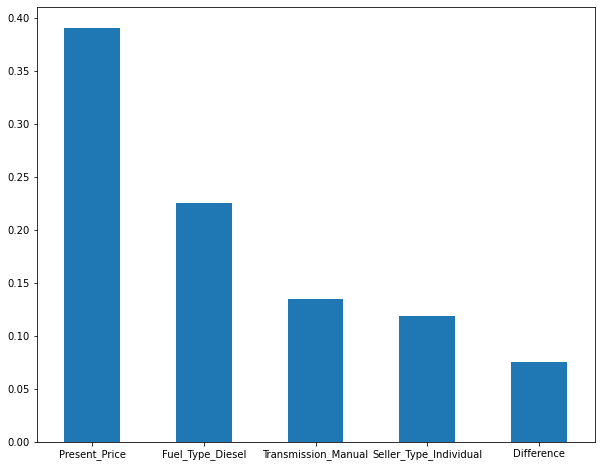

In [51]:
model = ExtraTreesRegressor()
class FeatureSelection:
    def feature_importance(self,x,y):
        model.fit(x,y)
        self.best_features = model.feature_importances_
    def visualize_important_features(self):
        plt.figure(figsize=(10,8))
        features = pd.Series(self.best_features,x.columns)
        features.nlargest(5).plot(kind = 'bar' , rot = 0 )
    def splitting_the_data(self,x,y):
        return train_test_split(x,y , test_size = 0.2)
f = FeatureSelection()
f.feature_importance(x,y)
f.visualize_important_features()
train_x , test_x , train_y , test_y = f.splitting_the_data(x,y) 

In [62]:
x_new = new_car_dataset[['Present_Price','Fuel_Type_Diesel','Transmission_Manual','Seller_Type_Individual','Difference']]
feature_train_x , feature_test_x , feature_train_y , feature_test_y = train_test_split(x_new,y , test_size = 0.2)

In [63]:
rfr_model = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200 , num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5 , 30 , num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [64]:
random_grid = {
                  'n_estimators' : n_estimators,
                  'max_features' : max_features,
                  'max_depth'    : max_depth,
                  'min_samples_split' : min_samples_split,
                  'min_samples_leaf'  : min_samples_leaf }

def hyperparameter_rsc(classifier,estimator,x,y):
    rf_random = RandomizedSearchCV(estimator = rfr_model , param_distributions = random_grid , scoring = 'neg_mean_squared_error',
                              n_iter = 10 , cv = 5 , verbose = 2 , random_state = 42 , n_jobs = -1)
    rf_fit = rf_random.fit(x,y)
    ht_params = rf_fit.best_params_
    ht_score = rf_fit.best_score_
    ht_estimator = rf_fit.best_estimator_
    return ht_params , ht_score , ht_estimator
rf_estimator , rf_ht_score , rf_ht_estimator = hyperparameter_rsc(rfr_model , random_grid ,x ,y)
new_feature_estimator , new_ht_score , new_estimator = hyperparameter_rsc(rfr_model , random_grid , x_new,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.8s finished


In [65]:
print(rf_ht_estimator)
print('-----------------------------')
print(new_estimator)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)
-----------------------------
RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)


In [66]:
class Predict:
    
    def fit_the_model(self,x,y):
        classifier1 = rf_ht_estimator
        fit1 = classifier1.fit(x , y)
        self.predict1 = fit1.predict(test_x)
        
    def predict_the_score(self,x):
        self.fit_the_model(train_x,train_y)
        total_error = mean_squared_error(x,self.predict1)
        fitting_score = r2_score(x,self.predict1)
        abs_error = mean_squared_error(x,self.predict1)
        return total_error , fitting_score , abs_error
    
    def fit_model_with_selected_features(self,x,y):
        classifier2 = new_estimator
        fit2 = classifier2.fit(x,y)
        self.predict2 = fit2.predict(feature_test_x)
        
    def predict_the_score_with_features(self,x):
        self.fit_model_with_selected_features(feature_train_x,feature_train_y)
        total_error = mean_squared_error(x,self.predict2)
        fitting_score = r2_score(x,self.predict2)
        abs_error = mean_squared_error(x,self.predict2)
        return total_error , fitting_score , abs_error
        
    

p = Predict()
error , score , abs_error = p.predict_the_score(test_y)
error_new , score_new , abs_error_new = p.predict_the_score_with_features(feature_test_y)
print('value for MSE : ',error ,':','fitting score : ',score)
print('value for MSE : ',error_new ,':','fitting score : ',score_new)

value for MSE :  1.8166283033262394 : fitting score :  0.9280571047768703
value for MSE :  0.87002695414473 : fitting score :  0.9612964895410707
